attend [11. 14. 18. 15.  2.  5. 12. 16.  2.  0.]
label_left [11. 14.  6. 18.  2.  5.  6. 10.  3. 14.]
label_right [15. 12. 18. 15. 12. 18. 12. 16.  2.  0.]
attend01 [0. 0. 1. 1. 0. 0. 1. 1. 1. 1.]
class_different_indices [   0    1    4 ... 2024 2029 2031]
shape of class_different_indices (1004,)
shape of left_indices (468,)
shape of right_indices (536,)
n_samples 500
n_trials 468
raw data left shape: (3, 234000)
raw data left, attending left, trial 0: [ 0.          8.30495834  6.72716999 ... 75.45306396 79.49226379
 71.67674255]
Creating RawArray with float64 data, n_channels=3, n_times=234000
    Range : 0 ... 233999 =      0.000 ...   467.998 secs
Ready.
raw data right shape: (3, 268000)
raw data right, attending right, first right attending trial: [  0.          16.3247776   16.00920868 ... 126.37789154 154.7988739
 140.4855957 ]
Creating RawArray with float64 data, n_channels=3, n_times=268000
    Range : 0 ... 267999 =      0.000 ...   535.998 secs
Ready.
events_left [[   0    0 

c:\Users\joshu\nice\.venv\Lib\site-packages\mne\epochs.py:406: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  selected = np.where(np.in1d(self.events[:, 2], values))[0]
c:\Users\joshu\nice\.venv\Lib\site-packages\mne\epochs.py:431: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  sub = np.where(np.in1d(selection, self.selection))[0]


0 bad epochs dropped
Not setting metadata
Not setting metadata
536 matching events found
No baseline correction applied
0 projection items activated
Loading data for 536 events and 500 original time points ...
0 bad epochs dropped


c:\Users\joshu\nice\.venv\Lib\site-packages\mne\epochs.py:406: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  selected = np.where(np.in1d(self.events[:, 2], values))[0]
c:\Users\joshu\nice\.venv\Lib\site-packages\mne\epochs.py:431: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  sub = np.where(np.in1d(selection, self.selection))[0]


tau_samples for 8: 4
Cannot autodetect number of jobs
Bypassing CSD
Filtering  at 41.67 Hz
Performing symbolic transformation
Running wsmi with python...
Cannot autodetect number of jobs
Bypassing CSD
Filtering  at 41.67 Hz
Performing symbolic transformation
Running wsmi with python...
tau_samples for 16: 8
Cannot autodetect number of jobs
Bypassing CSD
Filtering  at 20.83 Hz
Performing symbolic transformation
Running wsmi with python...
Cannot autodetect number of jobs
Bypassing CSD
Filtering  at 20.83 Hz
Performing symbolic transformation
Running wsmi with python...
tau_samples for 32: 16
Cannot autodetect number of jobs
Bypassing CSD
Filtering  at 10.42 Hz
Performing symbolic transformation
Running wsmi with python...
Cannot autodetect number of jobs
Bypassing CSD
Filtering  at 10.42 Hz
Performing symbolic transformation
Running wsmi with python...
tau_samples for 64: 32
Cannot autodetect number of jobs
Bypassing CSD
Filtering  at 5.21 Hz
Performing symbolic transformation
Running w

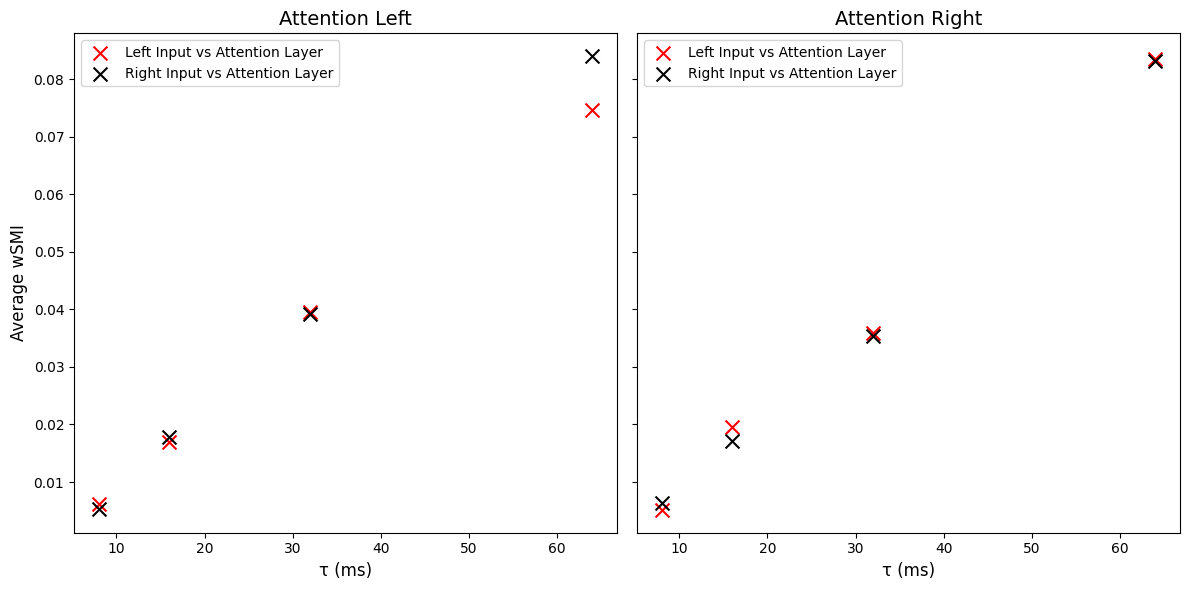

wsmi_results.shape (3, 3, 468)
wSMI matrix for the first trial (attention left) at tau=8 ms:
 [[0.         0.00228504 0.02923702]
 [0.         0.         0.00223716]
 [0.         0.         0.        ]]
wSMI matrix for the first trial (attention left) at tau=16 ms:
 [[0.         0.01912681 0.03944688]
 [0.         0.         0.00618852]
 [0.         0.         0.        ]]
wSMI matrix for the first trial (attention left) at tau=32 ms:
 [[0.         0.12345667 0.02594063]
 [0.         0.         0.00655333]
 [0.         0.         0.        ]]
wSMI matrix for the first trial (attention left) at tau=64 ms:
 [[0.         0.14327575 0.07129394]
 [0.         0.         0.08184199]
 [0.         0.         0.        ]]


In [5]:
import numpy as np
import mne
import pickle
import matplotlib.pyplot as plt
from nice.algorithms.connectivity import epochs_compute_wsmi
np.set_printoptions(threshold=100)  # Default threshold

#load data
file_path = 'C:/Users/joshu/PartIIIProject/RSNNdale_attention_1_attention_test'
data = pickle.load(open(file_path, 'rb'))

attention_labels = data['label_attend'][0]
print("attend", attention_labels[:10])
label_left = data['label_left'][0]
print("label_left", label_left[:10])
label_right = data['label_right'][0]
print("label_right", label_right[:10])
attend_01 = data['attend'][0]
print ("attend01", attend_01[:10])


#not filtered for omitted trials 
left_input_LFP = data['LFP'][0][0]  # Left input  [0,1] means left, Right 
right_input_LFP = data['LFP'][0][1]  # Right input
attention_LFP = data['LFP_rec'][0][2]  # Attention layer  [2] means attention 

omitted = data["omit"][0]
# print("omitted", omitted[:10])

#trials where label_left and label_right differ, and trial isn't omitted
class_different_indices = np.where((label_left != label_right) & (omitted == 0))[0]


#subset further based on attention
left_indices = np.where((label_left != label_right) & (omitted == 0) & (attend_01 == 0))[0]
right_indices = np.where((label_left != label_right) & (omitted == 0) & (attend_01 == 1))[0]

print("class_different_indices", class_different_indices)
print("shape of class_different_indices", class_different_indices.shape)
print("shape of left_indices", left_indices.shape)
print("shape of right_indices", right_indices.shape)

left_input_LFP_om_left = left_input_LFP[left_indices]
right_input_LFP_om_left = right_input_LFP[left_indices]

left_input_LFP_om_right = left_input_LFP[right_indices]
right_input_LFP_om_right = right_input_LFP[right_indices]

attention_LFP_om_left = attention_LFP[left_indices]
attention_LFP_om_right = attention_LFP[right_indices]

# attend [11. 14. 18. 15.  2.  5. 12. 16.  2.  0.]
# label_left [11. 14.  6. 18.  2.  5.  6. 10.  3. 14.]
# label_right [15. 12. 18. 15. 12. 18. 12. 16.  2.  0.]
# omitted [0. 0. 1. 1. 0. 0. 1. 1. 1. 1.]


n_times = left_input_LFP.shape[1] ##=500
n_trials = left_input_LFP_om_left.shape[0]
print("n_samples", n_times)
print("n_trials", n_trials)

dt = 0.002
sfreq = 1 / dt


ch_names = ['left_input', 'right_input', 'attention_layer']
ch_types = ['eeg', 'eeg', 'eeg']
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)


#reshaping data for attention left
raw_data_left = np.concatenate([
    left_input_LFP_om_left, 
    right_input_LFP_om_left, 
    attention_LFP_om_left
], axis=0)  # Concatenate along time axis

# Reshape into (n_channels, n_samples)
raw_data_left = raw_data_left.reshape(3, -1)  # Now (3, 468*500) = (3, 234000)
print('raw data left shape:', raw_data_left.shape)  # (3, 234000)
print('raw data left, attending left, trial 0:', raw_data_left[0, :n_times])
#raw data left, attending left, trial 0: [ 0.          8.30495834  6.72716999 ... 75.45306396 79.49226379, 71.67674255]


raw_left = mne.io.RawArray(raw_data_left, info)



#reshaping date for attention right 
raw_data_right = np.concatenate([
    left_input_LFP_om_right,
    right_input_LFP_om_right,
    attention_LFP_om_right
], axis=0)

raw_data_right = raw_data_right.reshape(3, -1)
print('raw data right shape:', raw_data_right.shape)
print('raw data right, attending right, first right attending trial:', raw_data_right[1, 2*n_times:3*n_times])
#raw data right, attending right, first right attending trial: [  0.          16.3247776   16.00920868 ... 126.37789154 154.798873,  140.4855957 ]
#this is good, it is the same as in the single trial case, and seems to be stacking correctly


raw_right = mne.io.RawArray(raw_data_right, info)

#Creating RawArray with float64 data, n_channels=3, n_times=268000
#    Range : 0 ... 267999 =      0.000 ...   535.998 secs     why this time? seems to be out by 0.002 seconds of what would be expected

#defininf event objects, arrays like [0,0,1], [500, 0, 1], [1000, 0, 1] etc
events_left = np.array([[i * n_times, 0, 1] for i in range(len(left_input_LFP_om_left))])
events_right = np.array([[i * n_times, 0, 1] for i in range(len(right_input_LFP_om_right))])


print("events_left", events_left[:4])

epochs_left = mne.Epochs(raw_left, events_left, event_id={'Trial': 1}, tmin=0, tmax=(n_times - 1) / sfreq, baseline=None, preload=True)
epochs_right = mne.Epochs(raw_right, events_right, event_id={'Trial': 1}, tmin=0, tmax=(n_times - 1) / sfreq, baseline=None, preload=True)

kernel = 3
taus = [8, 16, 32, 64]  # in ms
wsmi_results = {'left': {}, 'right': {}}

for tau in taus:
    tau_samples = int(tau / (1000 / sfreq))
    print(f"tau_samples for {tau}: {tau_samples}")
    
    wsmi_left, _, _, _ = epochs_compute_wsmi(
        epochs_left, kernel=kernel, tau=tau_samples, backend='python', method_params={'bypass_csd': True}
    )
    wsmi_results['left'][tau] = wsmi_left
    #this containts the data for wsmi at a given tau given attending left. 

    wsmi_right, _, _, _ = epochs_compute_wsmi(
        epochs_right, kernel=kernel, tau=tau_samples, backend='python', method_params={'bypass_csd': True}
    )
    wsmi_results['right'][tau] = wsmi_right

#plotting the mean wsmi values
wsmi_left_input_attleft = []  #wSMI for left input vs attention layer (attention left)
wsmi_right_input_attleft = []  #wSMI for right input vs attention layer (attention left)
wsmi_left_input_attright = []  #wSMI for left input vs attention layer (attention right)
wsmi_right_input_attright = []  #wSMI for right input vs attention layer (attention right)

#average wSMI for each τ for each condition
for tau in taus:
    # For attention left
    wsmi_left_input_attleft.append(np.mean(wsmi_results['left'][tau][0, 2, :]))  # Left input vs attention layer
    wsmi_right_input_attleft.append(np.mean(wsmi_results['left'][tau][1, 2, :]))  # Right input vs attention layer

    # For attention right
    wsmi_left_input_attright.append(np.mean(wsmi_results['right'][tau][0, 2, :]))  # Left input vs attention layer
    wsmi_right_input_attright.append(np.mean(wsmi_results['right'][tau][1, 2, :]))  # Right input vs attention layer


fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

#left subplot
axs[0].scatter(taus, wsmi_left_input_attleft, label="Left Input vs Attention Layer", marker="x",color = 'r', s=100)
axs[0].scatter(taus, wsmi_right_input_attleft, label="Right Input vs Attention Layer", marker="x",color = 'k', s=100)
axs[0].set_title("Attention Left", fontsize=14)
axs[0].set_xlabel("τ (ms)", fontsize=12)
axs[0].set_ylabel("Average wSMI", fontsize=12)
axs[0].legend()
axs[0].grid(False)

#right subplot
axs[1].scatter(taus, wsmi_left_input_attright, label="Left Input vs Attention Layer", marker="x", color = 'r', s=100)
axs[1].scatter(taus, wsmi_right_input_attright, label="Right Input vs Attention Layer", marker="x",color = 'k', s=100)
axs[1].set_title("Attention Right", fontsize=14)
axs[1].set_xlabel("τ (ms)", fontsize=12)
axs[1].legend()
axs[1].grid(False)

plt.tight_layout()
plt.show()









print('wsmi_results.shape', wsmi_results['left'][8].shape)
#wsmi_results.shape (3, 3, 468), so get a 3x3 for each trial. note that values for performing a single trial are different to 
#extracting the wsmi value of the first trial from wsmi_results. unsure why. 

for tau_to_check in taus:

    # Extract the wSMI matrix for the first trial (attention left)
    wsmi_first_trial_left = wsmi_results['left'][tau_to_check][:, :, 0]  # 0 corresponds to the first trial

    # Print the result
    print(f"wSMI matrix for the first trial (attention left) at tau={tau_to_check} ms:\n", wsmi_first_trial_left)



# wSMI matrix for the first trial (attention left) at tau=8 ms:
#  [[0.         0.00228504 0.02923702]
#  [0.         0.         0.00223716]
#  [0.         0.         0.        ]]
# wSMI matrix for the first trial (attention left) at tau=16 ms:
#  [[0.         0.01912681 0.03944688]
#  [0.         0.         0.00618852]
#  [0.         0.         0.        ]]
# wSMI matrix for the first trial (attention left) at tau=32 ms:
#  [[0.         0.12345667 0.02594063]
#  [0.         0.         0.00655333]
#  [0.         0.         0.        ]]
# wSMI matrix for the first trial (attention left) at tau=64 ms:
#  [[0.         0.14327575 0.07129394]
#  [0.         0.         0.08184199]
#  [0.         0.         0.        ]]

In [6]:
import numpy as np
import mne
import pickle
import matplotlib.pyplot as plt
from nice.algorithms.connectivity import epochs_compute_wsmi
np.set_printoptions(threshold=100)  #default threshold

#load data
file_path = 'C:/Users/joshu/PartIIIProject/RSNNdale_attention_1_attention_test'
data = pickle.load(open(file_path, 'rb'))

attention_labels = data['label_attend'][0]
label_left = data['label_left'][0]
label_right = data['label_right'][0]
attend_01 = data['attend'][0]


#not filtered for omitted trials 
left_input_LFP = data['LFP'][0][0]  # Left input  [0,1] means left, Right 
right_input_LFP = data['LFP'][0][1]  # Right input
attention_LFP = data['LFP_rec'][0][2]  # Attention layer  [2] means attention 
omitted = data["omit"][0]


# attend [11. 14. 18. 15.  2.  5. 12. 16.  2.  0.]
# label_left [11. 14.  6. 18.  2.  5.  6. 10.  3. 14.]
# label_right [15. 12. 18. 15. 12. 18. 12. 16.  2.  0.]
#attend01 [0. 0. 1. 1. 0. 0. 1. 1. 1. 1.]
#omitted [0. 0. 1. 1. 0. 1. 0. 1. 1. 1.]


trial_idx = 0
left_input_trial = left_input_LFP[trial_idx]
right_input_trial= right_input_LFP[trial_idx]
attention_trial = attention_LFP[trial_idx]

print("left_input_trial", left_input_trial[0:20])
print("right_input_trial", right_input_trial[0:20])
print("attention_trial", attention_trial[0:20])


raw_data_raw = np.stack([left_input_trial, right_input_trial, attention_trial])
print(raw_data_raw.shape)
print(raw_data_raw)
print('right, attending right, trial 14:', raw_data_raw[1])
#right, attending right, trial 14: [   0.           16.3247776    16.00920868   20.1116848...

n_times = raw_data_raw.shape[1] ##=500
print("n_samples", n_times)

dt = 0.002
sfreq = 1 / dt
ch_names = ['left_input', 'right_input', 'attention_layer']
ch_types = ['eeg', 'eeg', 'eeg']
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)


raw_data = mne.io.RawArray(raw_data_raw, info)

events = np.array([
    [0,0,1]
])


epochs_raw = mne.Epochs(raw_data, events, event_id={'Trial': 1}, tmin=0, tmax=(n_times - 1) / sfreq, baseline=None, preload=True)

print("Raw data shape:", raw_data.get_data().shape)
print("epochs_raw shape:", epochs_raw.get_data().shape)
print("Events array:", events)
print("Number of epochs:", len(epochs_raw))


kernel = 3
taus = [8, 16, 32, 64]  # in ms
#making wsmi results dictionary to store raw, normalised, and smoothed data
wsmi_results = {}

for tau in taus:
    tau_samples = int(tau / (1000 / sfreq))
    print(f"tau_samples for {tau}: {tau_samples}")
    
    wsmi, _, _, _ = epochs_compute_wsmi(
        epochs_raw, kernel=kernel, tau=tau_samples, backend='python', method_params={'bypass_csd': True}
    )

    wsmi_results[tau] = wsmi


for tau in taus:

    print("wsmi results raw", wsmi_results[tau][:, :, 0])

# wsmi results raw [[0.         0.00236065 0.02781281]
#  [0.         0.         0.00095507]
#  [0.         0.         0.        ]]
# wsmi results raw [[0.         0.01833334 0.02831222]
#  [0.         0.         0.00670613]
#  [0.         0.         0.        ]]
# wsmi results raw [[0.         0.11334197 0.00812583]
#  [0.         0.         0.01633531]
#  [0.         0.         0.        ]]
# wsmi results raw [[0.         0.12664354 0.10996675]
#  [0.         0.         0.10764085]
#  [0.         0.         0.        ]]

left_input_trial [  0.           8.30495834   6.72716999  17.83157539  26.3580246
  29.60149574  34.17854309  35.91835785  37.49335098  43.05618668
  64.86399841  57.88036346  66.82240295  74.06652832  73.64445496
 121.91060638 167.88856506 174.43197632 183.37971497 241.92445374]
right_input_trial [  0.          14.40653515  30.48147774  46.97054672  47.44320297
  56.93259048  60.98547745  64.2312851   65.99816895  68.06851959
  59.73459625  54.34347153  55.31502914  59.52558899 100.26635742
 166.98770142 143.7281189  132.62771606 149.89149475 202.01074219]
attention_trial [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(3, 500)
[[ 0.          8.30495834  6.72716999 ... 75.45306396 79.49226379
  71.67674255]
 [ 0.         14.40653515 30.48147774 ... 88.97128296 76.07688904
  75.87743378]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
right, attending right, trial 14: [ 0.         14.40653515 30.48147774 ... 88.97128296 76.07688904
 75.87743378]


c:\Users\joshu\nice\.venv\Lib\site-packages\mne\epochs.py:406: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  selected = np.where(np.in1d(self.events[:, 2], values))[0]
c:\Users\joshu\nice\.venv\Lib\site-packages\mne\epochs.py:431: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  sub = np.where(np.in1d(selection, self.selection))[0]


Running wsmi with python...
tau_samples for 16: 8
Cannot autodetect number of jobs
Bypassing CSD
Filtering  at 20.83 Hz
Performing symbolic transformation
Running wsmi with python...
tau_samples for 32: 16
Cannot autodetect number of jobs
Bypassing CSD
Filtering  at 10.42 Hz
Performing symbolic transformation
Running wsmi with python...
tau_samples for 64: 32
Cannot autodetect number of jobs
Bypassing CSD
Filtering  at 5.21 Hz
Performing symbolic transformation
Running wsmi with python...
wsmi results raw [[0.         0.00236065 0.02781281]
 [0.         0.         0.00095507]
 [0.         0.         0.        ]]
wsmi results raw [[0.         0.01833334 0.02831222]
 [0.         0.         0.00670613]
 [0.         0.         0.        ]]
wsmi results raw [[0.         0.11334197 0.00812583]
 [0.         0.         0.01633531]
 [0.         0.         0.        ]]
wsmi results raw [[0.         0.12664354 0.10996675]
 [0.         0.         0.10764085]
 [0.         0.         0.        ]]


In [7]:

from scipy.stats import pearsonr


attleft_pearson_left = []
attleft_pearson_right = []
attright_pearson_left = []
attright_pearson_right = []

for i in range(len(left_indices)):
    corr_left, _ = pearsonr(left_input_LFP_om_left[i], attention_LFP_om_left[i])
    attleft_pearson_left.append(corr_left)
    corr_right, _ = pearsonr(right_input_LFP_om_left[i], attention_LFP_om_left[i])
    attleft_pearson_right.append(corr_right)

for i in range(len(right_indices)):
    ccrr_left, _ = pearsonr(left_input_LFP_om_right[i], attention_LFP_om_right[i])
    attright_pearson_left.append(corr_left)
    corr_right, _ = pearsonr(right_input_LFP_om_right[i], attention_LFP_om_right[i])
    attright_pearson_right.append(corr_right)


mean_corr_left_attleft = np.mean(attleft_pearson_left)
mean_corr_right_attleft = np.mean(attleft_pearson_right)
mean_corr_left_attright = np.mean(attright_pearson_left)
mean_corr_right_attright = np.mean(attright_pearson_right)

print("mean_corr_left_attleft", mean_corr_left_attleft)
print("mean_corr_right_attleft", mean_corr_right_attleft)
print("mean_corr_left_attright", mean_corr_left_attright)
print("mean_corr_right_attright", mean_corr_right_attright)



#with smoothing

from scipy.ndimage import gaussian_filter1d

sigma = 3  # Standard deviation for Gaussian kernel
left_input_smoothed_att_left = gaussian_filter1d(left_input_LFP_om_left, sigma)
left_input_smoothed_att_right = gaussian_filter1d(left_input_LFP_om_right, sigma)
right_input_smoothed_att_left = gaussian_filter1d(right_input_LFP_om_left, sigma)
right_input_smoothed_att_right = gaussian_filter1d(right_input_LFP_om_right, sigma)
attention_smoothed_att_left = gaussian_filter1d(attention_LFP_om_left, sigma)
attention_smoothed_att_right = gaussian_filter1d(attention_LFP_om_right, sigma)


attleft_pearson_left = []
attleft_pearson_right = []
attright_pearson_left = []
attright_pearson_right = []

for i in range(len(left_indices)):
    corr_left, _ = pearsonr(left_input_smoothed_att_left[i], attention_smoothed_att_left[i])
    attleft_pearson_left.append(corr_left)
    corr_right, _ = pearsonr(right_input_smoothed_att_left[i], attention_smoothed_att_left[i])
    attleft_pearson_right.append(corr_right)

for i in range(len(right_indices)):
    corr_left, _ = pearsonr(left_input_smoothed_att_right[i], attention_smoothed_att_right[i])
    attright_pearson_left.append(corr_left)
    corr_right, _ = pearsonr(right_input_smoothed_att_right[i], attention_smoothed_att_right[i])
    attright_pearson_right.append(corr_right)


mean_corr_left_attleft = np.mean(attleft_pearson_left)
mean_corr_right_attleft = np.mean(attleft_pearson_right)
mean_corr_left_attright = np.mean(attright_pearson_left)
mean_corr_right_attright = np.mean(attright_pearson_right)

print("mean_corr_left_attleft smooth", mean_corr_left_attleft)
print("mean_corr_right_attleft smooth", mean_corr_right_attleft)
print("mean_corr_left_attright smooth", mean_corr_left_attright)
print("mean_corr_right_attright smooth", mean_corr_right_attright)



mean_corr_left_attleft 0.6953481737761144
mean_corr_right_attleft 0.698249970728365
mean_corr_left_attright 0.8270522025879182
mean_corr_right_attright 0.7214573963853714
mean_corr_left_attleft 0.8190476822322523
mean_corr_right_attleft 0.8207473159324343
mean_corr_left_attright 0.8095431031811829
mean_corr_right_attright 0.8347834439001339
